In [1]:
%tensorflow_version

Currently selected TF version: 2.x
Available versions:
* 1.x
* 2.x


In [0]:
%tensorflow_version 2.x


In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess
print('Tensorflow version: {}'.format(tf.__version__))

Tensorflow version: 2.2.0-rc2


In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images , train_labels) , (test_images , test_labels) = fashion_mnist.load_data()

train_images = train_images/255.0
test_images = test_images / 255.0

train_images = train_images.reshape(train_images.shape[0] , 28 , 28 , 1)
test_images = test_images.reshape(test_images.shape[0] , 28 , 28 , 1)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print('\ntrain_images.shape: {} , of {}'.format(train_images.shape, train_images.dtype))
print('\ntest_images.shape: {} , of {}'.format(test_images.shape , test_images.dtype))


4423680/4422102 [==============================] - 0s 0us/step

train_images.shape: (60000, 28, 28, 1) , of float64

test_images.shape: (10000, 28, 28, 1) , of float64


In [10]:
model = keras.Sequential([
                          keras.layers.Conv2D(input_shape = (28 , 28 , 1) , filters = 8 , kernel_size= 3,
                                              strides = 2 , activation = 'relu' , name = 'Conv1'),
                          keras.layers.Flatten(),
                          keras.layers.Dense(10 , activation=tf.nn.softmax , name = 'Softmax')
])
model.summary()

testing = False
epochs = 5

model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])
model.fit(train_images , train_labels , epochs=epochs)
test_loss , test_acc = model.evaluate(test_images , test_labels)
print('\nTest accuracy: {}'.format(test_acc))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 13, 13, 8)         80        
_________________________________________________________________
flatten_3 (Flatten)          (None, 1352)              0         
_________________________________________________________________
Softmax (Dense)              (None, 10)                13530     
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5420 - accuracy: 0.8119
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4101 - accuracy: 0.8558
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3785 - accuracy: 0.8667
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.

In [11]:
import tempfile

MODEL_DIR = tempfile.gettempdir()
version = 1
export_path = os.path.join(MODEL_DIR , str(version))
print('export_path = {}\n'.format(export_path))

tf.keras.models.save_model(
    model,
    export_path,
    overwrite = True,
    include_optimizer = True,
    save_format = None,
    signatures = None,
    options = None
)

print('\nSaved model:')
!ls -l {export_path}

export_path = /tmp/1

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /tmp/1/assets

Saved model:
total 84
drwxr-xr-x 2 root root  4096 Apr  7 16:52 assets
-rw-r--r-- 1 root root 76558 Apr  7 16:52 saved_model.pb
drwxr-xr-x 2 root root  4096 Apr  7 16:52 variables


In [12]:
!saved_model_cli show --dir {export_path} --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['Conv1_input'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 28, 28, 1)
        name: serving_default_Conv1_input:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['Softmax'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 10)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/predict
W0407 16:53:22.320588 139812855961472 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/pytho

In [13]:
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  22638      0 --:--:-- --:--:-- --:--:-- 22638
OK
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:4 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3,012 B]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos

In [14]:
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 31 not upgraded.
Need to get 175 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 2.1.0 [175 MB]
Fetched 175 MB in 3s (67.2 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 144568 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.1.0_all.deb ...
Unpacking tensorflow-model-server (2.1.0) ...
Setting up tensorflow-model-server (2.1.0) ...


In [0]:
os.environ["MODEL_DIR"] = MODEL_DIR

In [18]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=fashion_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

Starting job # 2 in a separate thread.


In [19]:
!tail server.log

[warn] getaddrinfo: address family for nodename not supported
[evhttp_server.cc : 238] NET_LOG: Entering the event loop ...


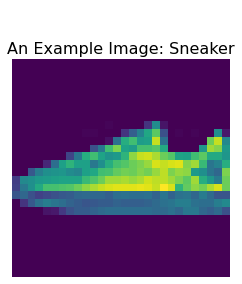

In [21]:
def show(idx , title):
  plt.figure()
  plt.imshow(test_images[idx].reshape(28 , 28))
  plt.axis('off')
  plt.title('\n\n{}'.format(title) , fontdict={'size': 16})

import random
rando = random.randint(0 , len(test_images)-1)
show(rando , 'An Example Image: {}'.format(class_names[test_labels[rando]]))

In [23]:
import json
data = json.dumps({"signature_name": "serving_default" , "instances": test_images[0:3].tolist()})
print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))

Data: {"signature_name": "serving_default", "instances": ...  [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]]]]}


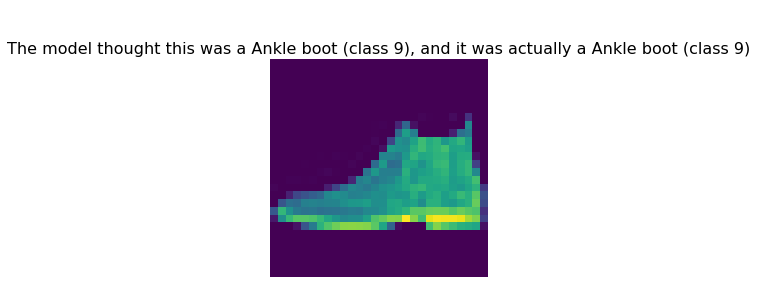

In [25]:
!pip install -q requests

import requests
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/fashion_model:predict', data=data, headers=headers)
predictions = json.loads(json_response.text)['predictions']

show(0, 'The model thought this was a {} (class {}), and it was actually a {} (class {})'.format(
  class_names[np.argmax(predictions[0])], np.argmax(predictions[0]), class_names[test_labels[0]], test_labels[0]))

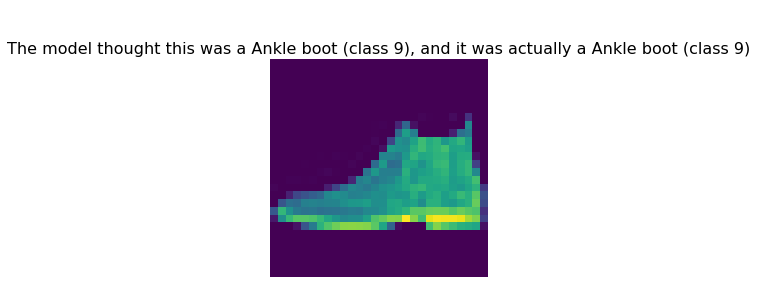

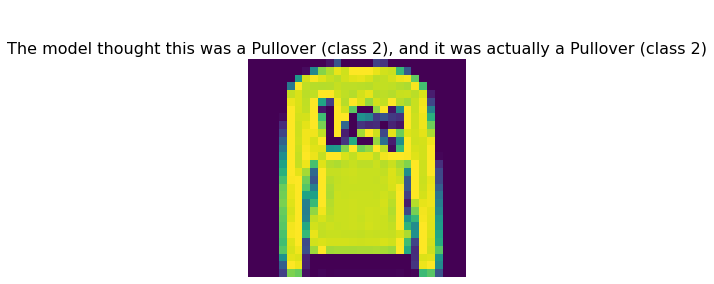

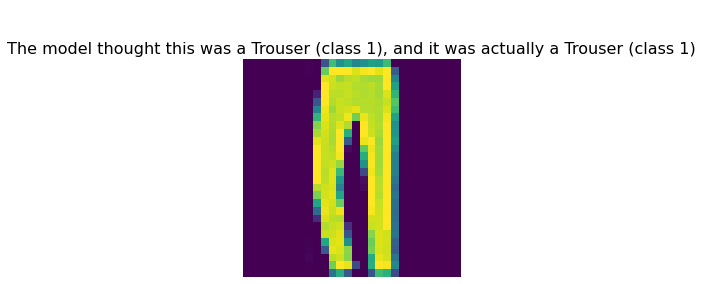

In [26]:
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/fashion_model/versions/1:predict', data=data, headers=headers)
predictions = json.loads(json_response.text)['predictions']

for i in range(0,3):
  show(i, 'The model thought this was a {} (class {}), and it was actually a {} (class {})'.format(
    class_names[np.argmax(predictions[i])], np.argmax(predictions[i]), class_names[test_labels[i]], test_labels[i]))